# Descriptive Analysis 
A descriptive analysis of the entire, filtered dataset. Is focussed on the analysis of :
1. regional vs. national newspapers
2. ressorts
3. articles overtime
4. length of articles

### Imports

In [4]:
# packages
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm 
from datetime import datetime
from ast import literal_eval

In [5]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# change cwd
%cd drive/MyDrive/Work/Frontline/data
#%cd /content/drive/MyDrive/data/

/content/drive/.shortcut-targets-by-id/1WfnZsqpG1r110J63sMbfS5TpsDOkveiV/data


In [7]:
# filtered data
data=pd.read_csv("filtered/filtered_06_08.csv")

### Constants

In [8]:
regional_newspapers=['Aachener Nachrichten',
 'Aachener Zeitung',
 'Alb Bote',
 'Aller-Zeitung',
 'Allgemeine Zeitung Mainz-Rheinhessen',
 'Badische Zeitung',
 'Barmstedter Zeitung',
 'Bayerische Rundschau',
 'Bergedorfer Zeitung',
 'Bergische Morgenpost',
 'Berliner Kurier',
 'Berliner Morgenpost',
 'Berliner Zeitung',
 'Bersenbrücker Kreisblatt',
 'Bonner General-Anzeiger',
 'Bote vom Haßgau',
 'Bramscher Nachrichten',
 'Braunschweiger Zeitung',
 'Coburger Tageblatt',
 'DIE KITZINGER',
 'Darmstädter Echo',
 'Der Prignitzer',
 'Dresden am Wochenende',
 'Dresdner Morgenpost',
 'Dresdner Neueste Nachrichten',
 'Döbelner Allgemeine Zeitung',
 'Eichsfelder Tageblatt',
 'Ems-Zeitung',
 'Freie Presse',
 'Fränkischer Tag',
 'Gießener Anzeiger',
 'Göttinger Tageblatt',
 'Haller Tagblatt',
 'Hamburger Abendblatt',
 'Hamburger Morgenpost',
 'HarzKurier',
 'Heilbronner Stimme',
 'Hessische Niedersächsische Allgemeine',
 'Hildesheimer Allgemeine Zeitung',
 'Hochheimer Zeitung',
 'Hofheimer Zeitung',
 'Hohenloher Tagblatt',
 'Hohenzollerische Zeitung',
 'Husumer Nachrichten',
 'Höchster Kreisblatt',
 'Idsteiner Zeitung',
 'Kieler Nachrichten',
 'Kirner Zeitung',
 'Kreis-Anzeiger',
 'Lampertheimer Zeitung',
 'Landshuter Zeitung',
 'Lausitzer Rundschau - Elbe-Elster-Rundschau',
 'Lauterbacher Anzeiger',
 'Le Monde Diplomatique',
 'Leipziger Volkszeitung',
 'Lingener Tagespost',
 'Lübecker Nachrichten',
 'Magdeburger General-Anzeiger','Münsterland Zeitung',
 'Nahe Zeitung', 
 'Nassauische Neue Presse',
 'Neue Osnabrücker Zeitung','Neue Ruhr/Rhein Zeitung',
 'Neue Westfälische',
 'Neue Württembergische Zeitung',
 'Neuss-Grevenbroicher Zeitung',
 'Neue Presse Hannover',
 'Magdeburger Volksstimme','Main-Post',
 'Main-Spitze','Nordbayerischer Kurier',
 'Norddeutsche Neueste Nachrichten',
 'Norddeutsche Rundschau','Nordkurier',
 'Nordwest-Zeitung',
 'Nürnberger Nachrichten','Oberhessische Zeitung',
 'Oeffentlicher Anzeiger',
 'Oschatzer Allgemeine Zeitung',
 'Osterländer Volkszeitung','Passauer Neue Presse',
 'Peiner Allgemeine Zeitung',
 'Reutlinger General-Anzeiger',
 'Rhein-Hunsrück-Zeitung',
 'Rhein-Lahn-Zeitung',
 'Rhein-Zeitung','Ruhr Nachrichten',
 'Rundschau für den Schwäbischen Wald',
 'Rüsselsheimer Echo',
 'Saale-Zeitung',
 'Saarbrücker Zeitung',
 'Salzgitter-Zeitung','Thüringische Landeszeitung',
 'Trierischer Volksfreund',
 'Usinger Anzeiger',
 'Volksblatt Würzburg',
 'Volkszeitung Schweinfurt'
 'Ostsee-Zeitung',
 'Ostthüringer Zeitung','Schweinfurter Tagblatt',
 'Schweriner Volkszeitung','Ostsee-Zeitung',
 'Volkszeitung Schweinfurt',
 'Westerwälder Zeitung',
 'Wiesbadener Kurier',
 'Wiesbadener Tagblatt',
 'Schwäbische Zeitung',
 'Segeberger Zeitung',
 'Solinger Morgenpost','Nürnberger Zeitung',
 'Straubinger Tagblatt',
 'Sächsische Zeitung',
 'Südkurier',
 'Taunus Zeitung','Wittlager Kreisblatt',
 'Wolfenbütteler Zeitung',
 'Wolfsburger Allgemeine Zeitung',
 'Wolfsburger Nachrichten',
 'Wormser Zeitung',
 'Thüringer Allgemeine',
 'Straubinger Tagblatt'
 'Nürnberger Zeitung',
 'Kölnische Rundschau']
national_newspapers=['Audio Video Foto Bild','Börsen-Zeitung','F.A.Z. Einspruch',
 'F.A.Z. Wirtschaftswissenschaft','FOCUS',
 'Frankfurter Neue Presse','Handelsblatt',
 'Handelsblatt Morning Briefing',"Jüdische Allgemeine","Süddeutsche Zeitung",
 'Frankfurter Rundschau',"Hannoversche Allgemeine Zeitung", 'ZEIT Campus',
 'ZEIT Studienführer',
 'ZEIT Wissen','Kölner Stadt-Anzeiger',
 'taz.die tageszeitung',"LiteraturSPIEGEL",
 'Christ und Welt','B.Z.',"BILD","BUSINESS INSIDER DEUTSCHLAND",'Spiegel Start',
 'Sport Bild', 'WELT KOMPAKT',
 'WELT ONLINE','Meller Kreisblatt',
 'Meppener Tagespost',
 'Metzinger Uracher Volksblatt',
 'Mittelbayerische Zeitung','Westfalen-Blatt',
 'Westfalenpost',
 'Mitteldeutsche Zeitung',"Wirtschaftszeitung",
 'WELT am SONNTAG',
 'Stern', "Märkische Allgemeine","SÜDWEST PRESSE",'Westdeutsche Allgemeine Zeitung',
 'Westdeutsche Zeitung','Le Monde Diplomatique',"Westfälische Rundschau","Rheinische Post",'Münchner Merkur',"BILD am Sonntag","Abendzeitung",'DIE ZEIT online','ZEIT Geschichte','DIE ZEIT', "DER SPIEGEL","DIE WELT","EXPRESS","taz","SPIEGEL Plus",'Bild der Frau','DER SPIEGEL online']


### 1. Regional vs. National

In [9]:
data["category"]=["regional" if name in regional_newspapers else "national" for name in data.name ]

In [10]:
data["category"].value_counts()

regional    16894
national     8447
Name: category, dtype: int64

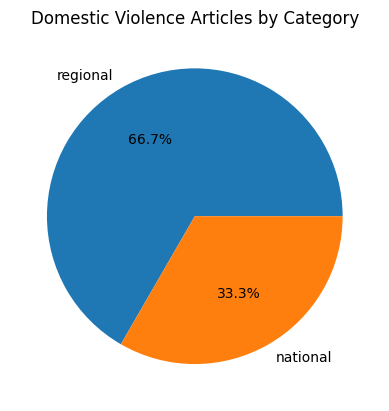

In [11]:
plt.pie(data["category"].value_counts(),labels=list(data["category"].value_counts().keys()),autopct='%1.1f%%');
plt.title("Domestic Violence Articles by Category");

In [12]:
print("Total number of represented newspapers: ",data.name.nunique())
top=30
print(f"\nTop {top} of represented newspapers:\n")
round(data.name.value_counts(normalize=True)[:top].mul(100),2).astype(str)+" %"

Total number of represented newspapers:  172

Top 30 of represented newspapers:



WELT ONLINE                 4.49 %
Rhein-Zeitung               3.46 %
Neue Westfälische           3.13 %
Schwäbische Zeitung         2.59 %
Rhein-Lahn-Zeitung          2.42 %
Münchner Merkur             2.28 %
taz.die tageszeitung        1.98 %
DER SPIEGEL online          1.89 %
Kölner Stadt-Anzeiger       1.84 %
Nordwest-Zeitung            1.75 %
Frankfurter Rundschau       1.72 %
Kölnische Rundschau         1.63 %
Südkurier                   1.63 %
Märkische Allgemeine        1.61 %
Ruhr Nachrichten            1.61 %
Westfalen-Blatt              1.5 %
Mitteldeutsche Zeitung       1.5 %
Hamburger Abendblatt        1.46 %
Lübecker Nachrichten        1.41 %
Mittelbayerische Zeitung    1.36 %
Sächsische Zeitung          1.34 %
BILD                         1.3 %
Straubinger Tagblatt        1.29 %
Thüringer Allgemeine        1.28 %
Passauer Neue Presse        1.26 %
Landshuter Zeitung          1.21 %
Nordkurier                   1.2 %
Freie Presse                 1.2 %
Ostsee-Zeitung      

### 2. Ressorts

In [13]:
print("Total number of represented ressorts: ",data.ressort.nunique())

Total number of represented ressorts:  1367


In [14]:
data.ressort=data.ressort.str.title()
ressort_rename={"PANORAMA":"Panorama","Titel":"Titelseite","Meinung Und Debatte":"Debatte","Aus Der Region":"Region",
                "Ausland":"Aus Aller Welt","Blick In Die Welt":"Aus Aller Welt","Antworten Und Debatte":"Debatte",
                "/Wn/Regiodesk Wb/Aus Aller Welt":"Aus Aller Welt","Rund Um Die Welt":"Aus Aller Welt", "Welt":"Aus Aller Welt","Weltspiegel":"Aus Aller Welt",
                "Welt Im Spiegel":"Aus Aller Welt",
                "Welt Aktuell":"Aus Aller Welt",
                "Deutschland":"Inland",
                "Land":"Inland",
                "F.A.Z. Einspruch":"Justiz",
                "Nrw Und Deutschland":"Inland"
}
data.ressort=data.ressort.replace(ressort_rename)


In [15]:
ressort_rename_regex={"[A-z +\&/\n,0-9;]*Lokal\S*[&äA-z \/]*":"Lokales",
                      "Ressort:\s":"",
                      "\S*[A-z \/\n]*Politik\S*[A-z \/\n]*":"Politik",
                      "\S*[A-z \&/\n]*Kultur\S*[A-z \/]*":"Kultur",
                      "Titel\S*[A-z \/]*":"Titelseite","\S*[A-z \&/\n]*Justiz\S*[&äA-z \/]*":"Justiz",
                      "\S*[A-z \&/\n]*Hintergrund\S*[&äA-z \/]*":"Hintergrund",
                      "\S*[A-z \&/\n]*Leser\S*[&äA-z \/]*":"Leser",
                      "\S*[A-z \&/\n]*Medien\S*[&äA-z \/]*":"Medien",
                      "\S*[A-z \&/\n]*Forum\S*[&äA-z \/]*":"Forum",
                      "[A-z +\&/\n,0-9\-;]*Meinung\S*[&äA-z \/]*":"Meinung",
                      "[A-z +\&/\n,0-9()Üß\-;]*Sport\S*[&äA-z \/]*":"Sport",
                      "[A-z ]*Aktuell\S*[&äA-z \/]*":"Aktuell",
                      "[A-z &ü\-]*Region\S*[\&\-äA-z \/]*":"Region",
                      "[A-z &ü\-]*region\S*[\&\-äA-z \/]*":"Region",
                      "[A-z &ü\-]*Panorama\S*[\&\-äA-z \/]*":"Panorama",
        
    
}
data.ressort=data.ressort.replace(ressort_rename_regex,regex=True)

In [16]:
top10_ressort=list(data.ressort.value_counts(normalize=True)[:10].keys())

In [17]:
mask=[res not in top10_ressort for res in data.ressort]

In [18]:
temp_data=data
temp_data.loc[mask,"ressort"]="Alle anderen Ressorts \n(<1%)"

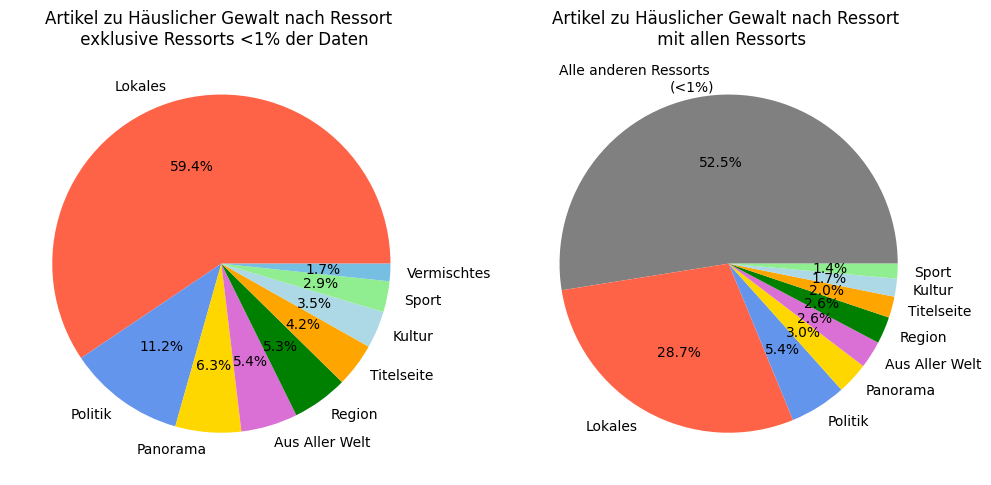

In [19]:
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.pie(temp_data.ressort.value_counts(normalize=True)[1:10],labels=temp_data.ressort.value_counts(normalize=True).keys()[1:10],autopct='%1.1f%%',colors=[
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"orange","lightblue","lightgreen", 
        # any color using the color codes
        "#77BFE2"]);
plt.title("Artikel zu Häuslicher Gewalt nach Ressort \n exklusive Ressorts <1% der Daten",);
plt.subplot(122)
plt.pie(temp_data.ressort.value_counts(normalize=True)[:9],labels=temp_data.ressort.value_counts(normalize=True).keys()[:9],autopct='%1.1f%%',colors=[
        # matplotlib named colors 
        "grey",'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"orange","lightblue","lightgreen", 
        # any color using the color codes
        "#77BFE2"]);
plt.title("Artikel zu Häuslicher Gewalt nach Ressort \n mit allen Ressorts");

In [20]:
list(temp_data.ressort.value_counts(normalize=True)[:9])

[0.5169093563789906,
 0.28242768635807586,
 0.05311550451836944,
 0.02987253857385265,
 0.025768517422359024,
 0.02533443826210489,
 0.01992817962984886,
 0.01685016376622864,
 0.01400891835365613]

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=temp_data.ressort.value_counts(normalize=True)[:9].keys(), title='Artikel zu Häuslicher Gewalt nach Ressort\n',values=list(temp_data.ressort.value_counts(normalize=True)[:9]))])
fig.show()

### 3. Timeline

In [ ]:
data.datum=data.datum.apply(pd.to_datetime,format="%Y%m%d")

In [23]:
import plotly.express as px

In [68]:
data_grouped=data.groupby("datum").count()["artikel_id"]
data_grouped=pd.DataFrame(data_grouped).reset_index().rename(columns={"artikel_id":"Veröffentlichte Artikel (pro Tag)", "datum":"Datum"})

In [52]:
fig = px.line(data_grouped, y= "Veröffentlichte Artikel",x="Datum", title='Veröffentlichte Artikel zum Thema Häusliche Gewalt')
fig.show()

In [69]:
data_grouped_monthly=data_grouped
# data_grouped_monthly.Datum=[i.to_period("M") for i in data_grouped_monthly.Datum]
# data_grouped_monthly=data_grouped.groupby("Datum").sum().reset_index()

In [74]:
data_grouped_monthly.Datum=[i +pd.offsets.MonthBegin(-1) for i in data_grouped_monthly.Datum]

In [86]:
data_grouped_monthly=data_grouped_monthly.groupby("Datum").sum().reset_index().rename(columns={"Veröffentlichte Artikel":"Veröffentlichte Artikel (pro Monat)"})

In [88]:
fig = px.bar(data_grouped_monthly, y= "Veröffentlichte Artikel (pro Monat)",x="Datum", title='Veröffentlichte Artikel zum Thema Häusliche Gewalt')
fig.show()

### 4. Article Lengths

In [121]:
len(data.text[0].split())

115

In [122]:
data.lengths.max()

8432

In [114]:
px.histogram(data,"lengths",nbins=100)